<a href="https://colab.research.google.com/github/Tsion-Ketema/Image-processing-assignment-No-4/blob/main/Assignment_4_Tsion_Ketema_Araya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Assignment 4 - Edge Detection
### Name: Tsion Ketema Araya

In [37]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import os

dataset_path = "/content/drive/MyDrive/weizmann_horse_db/horse"
# 3 Images are taken for comparsion
image1_path = os.path.join(dataset_path, "horse050.png")
image2_path = os.path.join(dataset_path, "horse090.png")
image3_path = os.path.join(dataset_path, "horse150.png")


Original Image 1:


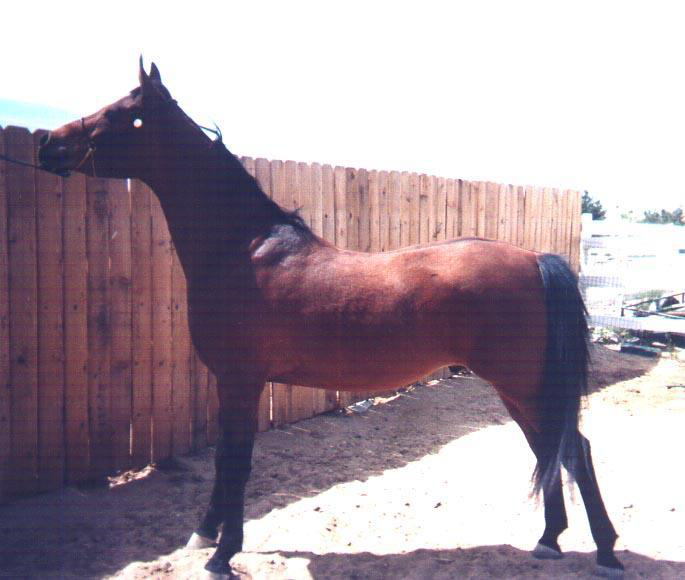

Original Image 2:


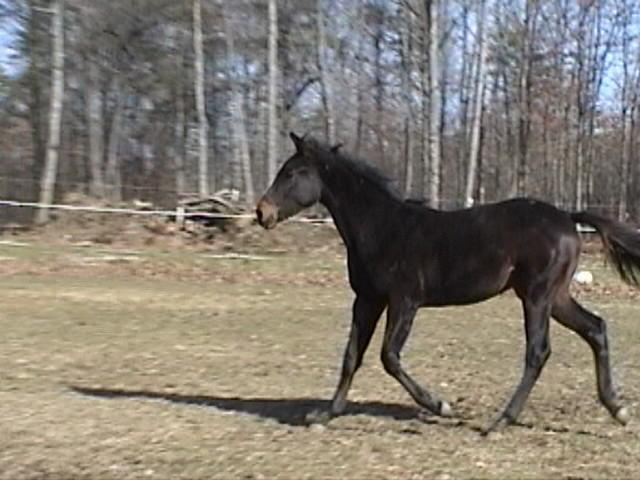

Original Image 3:


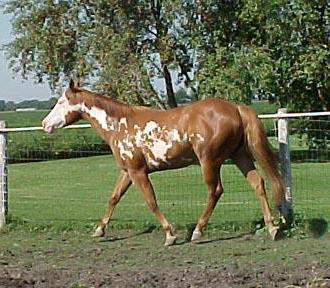

In [39]:
from IPython.display import display
from PIL import Image

# Load images using PIL and display them
image1 = Image.open(image1_path)
image2 = Image.open(image2_path)
image3 = Image.open(image3_path)

print("Original Image 1:")
display(image1)

print("Original Image 2:")
display(image2)

print("Original Image 3:")
display(image3)


In [40]:
def orginal_image_to_grayscale(image_path):
    """
    Reads an image file and converts it into a grayscale 2D list.
    """
    img = Image.open(image_path).convert("L")  # Convert to grayscale
    width, height = img.size
    image = [[img.getpixel((j, i)) for j in range(width)] for i in range(height)]  # extract the pixel values

    return image

# Convert images to grayscale then pixel extraction.
image1_gray = orginal_image_to_grayscale(image1_path)
image2_gray = orginal_image_to_grayscale(image2_path)
image3_gray = orginal_image_to_grayscale(image3_path)


In [41]:
def convolve_image(image, kernel):
    """
    Here is the functions that performs the manual convoltion.

    image: 2D list representing grayscale image.
    kernel: 2D list representing filter.

    Returns: 2D list of filtered image.
    """
    img_height = len(image)
    img_width = len(image[0])
    kernel_height = len(kernel)
    kernel_width = len(kernel[0])


    output_height = img_height - kernel_height + 1
    output_width = img_width - kernel_width + 1

    output = [[0] * output_width for _ in range(output_height)]

  # The kernel sliding over the image and weighted sum calculation
    for i in range(output_height):
        for j in range(output_width):
            sum_value = 0
            for ki in range(kernel_height):
                for kj in range(kernel_width):
                    sum_value += image[i + ki][j + kj] * kernel[ki][kj]
            output[i][j] = sum_value

    return output


In [43]:
def roberts_edge_detection(image):
    roberts_x = [[1, 0], [0, -1]]
    roberts_y = [[0, 1], [-1, 0]]

    gx = convolve_image(image, roberts_x)
    gy = convolve_image(image, roberts_y)

    return [[(gx[i][j]**2 + gy[i][j]**2)**0.5 for j in range(len(gx[0]))] for i in range(len(gx))]


In [44]:
def prewitt_edge_detection(image):
    prewitt_x = [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]
    prewitt_y = [[1, 1, 1], [0, 0, 0], [-1, -1, -1]]

    gx = convolve_image(image, prewitt_x)
    gy = convolve_image(image, prewitt_y)

    return [[(gx[i][j]**2 + gy[i][j]**2)**0.5 for j in range(len(gx[0]))] for i in range(len(gx))]


In [45]:
def sobel_edge_detection(image):
    sobel_x = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
    sobel_y = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]

    gx = convolve_image(image, sobel_x)
    gy = convolve_image(image, sobel_y)

    return [[(gx[i][j]**2 + gy[i][j]**2)**0.5 for j in range(len(gx[0]))] for i in range(len(gx))]


In [46]:
# Apply edge detection to all three images
roberts_result1 = roberts_edge_detection(image1_gray)
prewitt_result1 = prewitt_edge_detection(image1_gray)
sobel_result1 = sobel_edge_detection(image1_gray)

roberts_result2 = roberts_edge_detection(image2_gray)
prewitt_result2 = prewitt_edge_detection(image2_gray)
sobel_result2 = sobel_edge_detection(image2_gray)

roberts_result3 = roberts_edge_detection(image3_gray)
prewitt_result3 = prewitt_edge_detection(image3_gray)
sobel_result3 = sobel_edge_detection(image3_gray)



*** Edge Detection for Image 1 ***
Roberts Edge Detection - Image 1


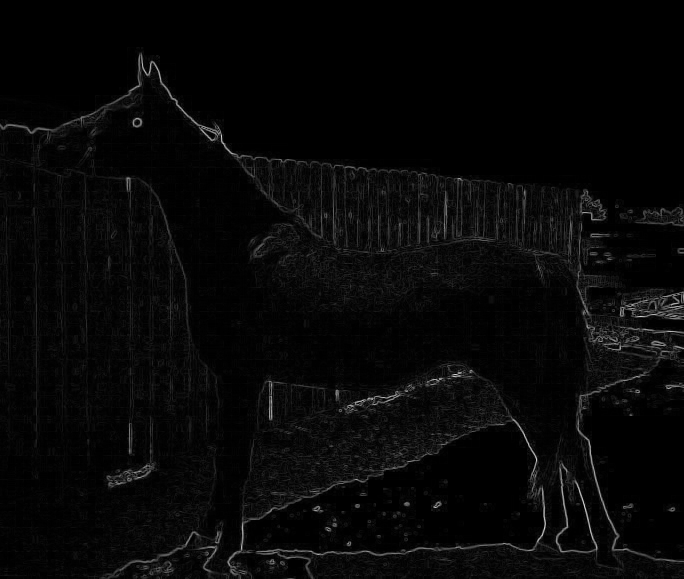

Prewitt Edge Detection - Image 1


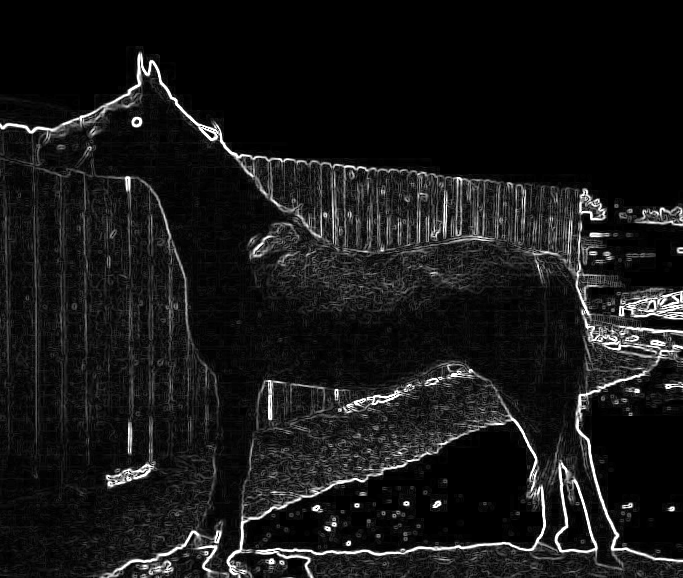

Sobel Edge Detection - Image 1


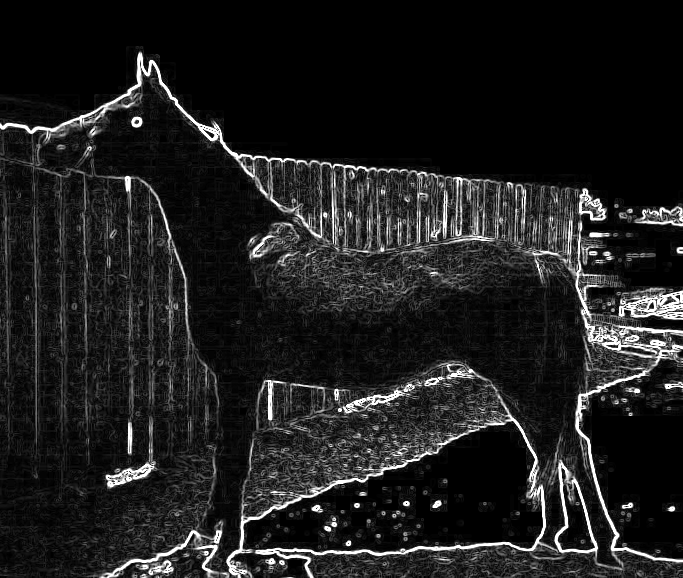


*** Edge Detection for Image 2 ***
Roberts Edge Detection - Image 2


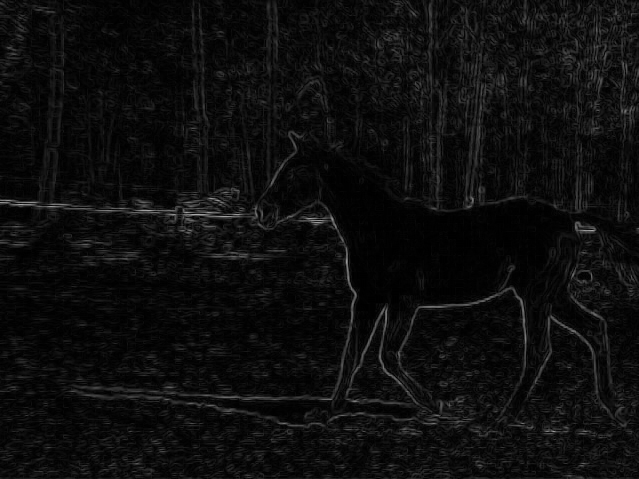

Prewitt Edge Detection - Image 2


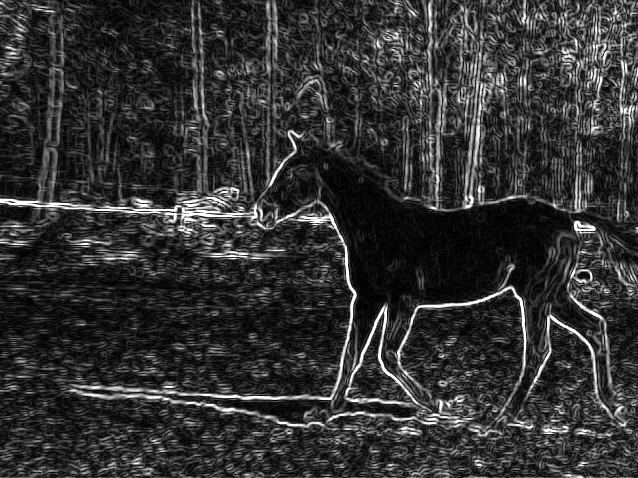

Sobel Edge Detection - Image 2


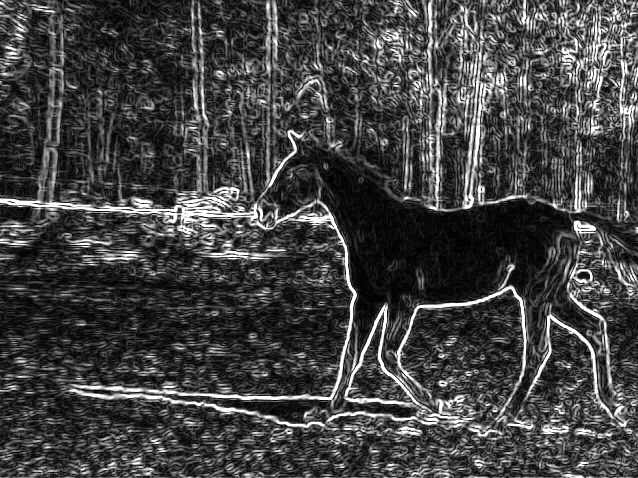


*** Edge Detection for Image 3 ***
Roberts Edge Detection - Image 3


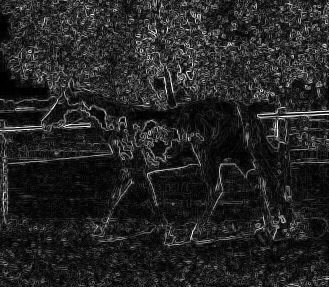

Prewitt Edge Detection - Image 3


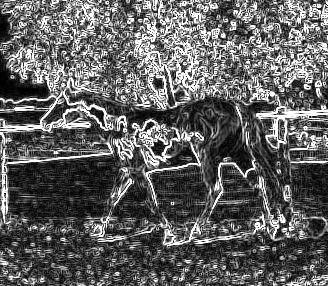

Sobel Edge Detection - Image 3


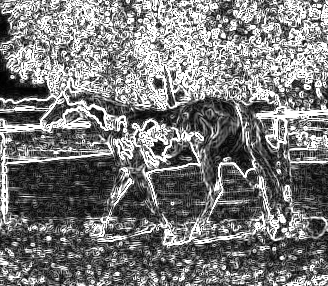

In [47]:
def convert_to_pil_image(image_list):
    """ Converts a 2D list of grayscale values into a PIL image. """
    height = len(image_list)
    width = len(image_list[0])
    img = Image.new("L", (width, height))

    for i in range(height):
        for j in range(width):
            img.putpixel((j, i), int(image_list[i][j]))

    return img

# List of images
images = [roberts_result1, prewitt_result1, sobel_result1], \
         [roberts_result2, prewitt_result2, sobel_result2], \
         [roberts_result3, prewitt_result3, sobel_result3]

# Image names
image_names = ["Image 1", "Image 2", "Image 3"]
filter_names = ["Roberts", "Prewitt", "Sobel"]

# Convert and display results for one image at a time
for i in range(3):  # Loop through each image
    print(f"\n*** Edge Detection for {image_names[i]} ***")

    for j in range(3):  # Apply all 3 filters sequentially
        edge_image = convert_to_pil_image(images[i][j])  # Convert 2D list to image

        print(f"{filter_names[j]} Edge Detection - {image_names[i]}")
        display(edge_image)  # Display the image



***Comparison of Filters for Edge Detection ***

**The Roberts Filter **
1. The horse's edges are recognized , fastest but least detailed edge detection method.
2. Makes the image less cluttered than Prewitt and Sobel by reducing background noise.
3. Lacks the clarity required for a strong form distinction.
4. Has trouble characterizing the horse's outline, which reduces the effectiveness of the result for distinct border recognition.

**The Prewitt Filter **
1. More balanced approach: Identifies the horse's edges accurately, a bit less sharply than Sobel. .
2. Stable detection since it is less susceptible to noise than Roberts.
3. A little less detail than Sobel.

**The Sobel Filter**
1. It creates distinct, sharp horse outlines.
2. Clearly distinguishes the horse's outline from the background by capturing both strong and subtle edges.


**Final conclusion **

• The horse's structure is well observed in Sobel filter, which offers
the cleanest and most detailed edge detection.
• The Prewitt filter provides a balanced detection, successfully catching background and horse features.
The fastest but least successful filter is Robert's, which has trouble defining the horse's shape. Sobel is the best at emphasizing distinct edges, particularly when it comes to setting the horse out from its surroundings.

